<a href="https://colab.research.google.com/github/shahisha/End-to-End-Deep-Learning/blob/main/AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.model_selection import train_test_split

In [ ]:
# Loading the dataset
iris = datasets.load_iris()

X = iris.data
y = iris.target
print("X:",X[0])
target_names = iris.target_names


# Scaling the data
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

X: [5.1 3.5 1.4 0.2]


In [ ]:
# Function for plotting the graphs

def plot3clusters(X, title, vtitle):
    plt.figure()
    colors = ['navy','turquoise','darkorange']
    for color, i, target_name in zip(colors, [0,1,2], target_names):
        plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target_name)
        plt.legend(loc='upper left')
        plt.title(title)
        plt.xlabel(vtitle + "1")
        plt.ylabel(vtitle + "2")
        plt.show()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 2)                 10        
                                                                 
 dense_1 (Dense)             (None, 4)                 12        
                                                                 
Total params: 22 (88.00 Byte)
Trainable params: 22 (88.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


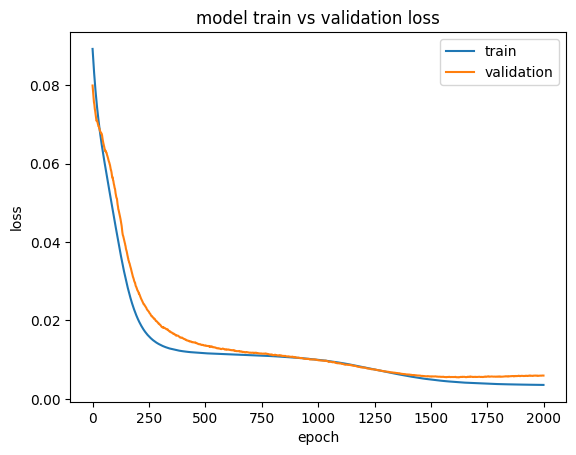

5/5 [==============================] - 0s 2ms/step


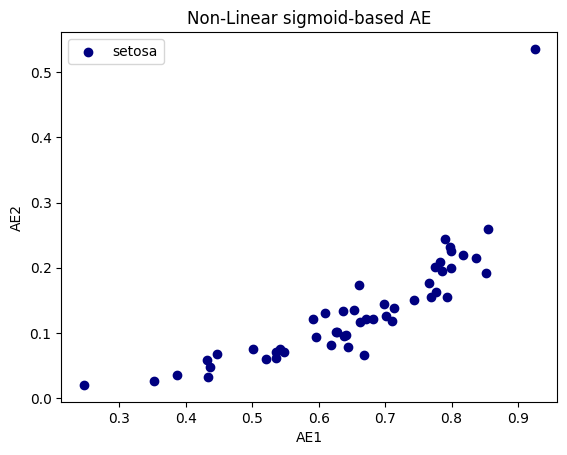

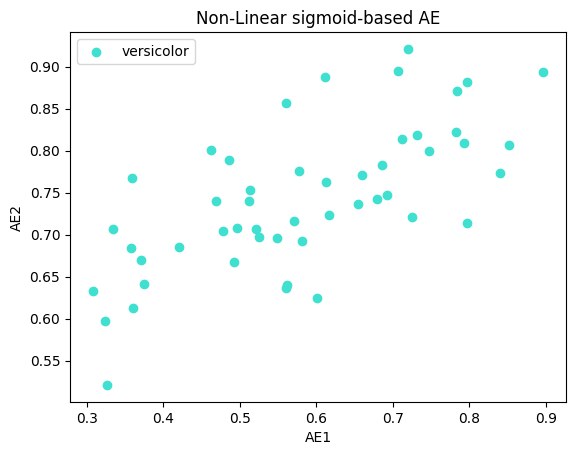

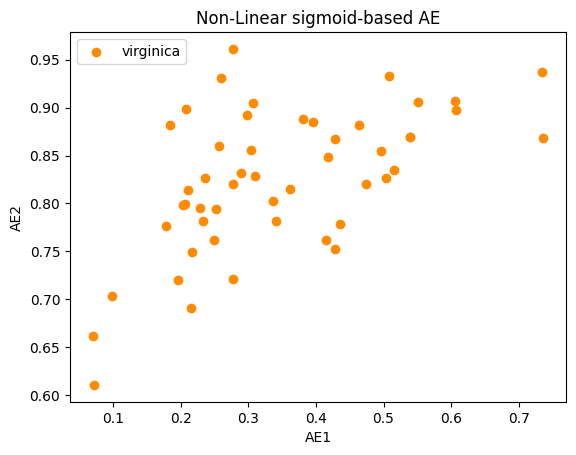

In [ ]:
# this is the size of our encoded representations
input_dim = X_scaled.shape[1]
encoding_dim = 2

# this is our input placeholder
input_img = Input(shape=(input_dim,))

# "encoded" representation of the input
encoded = Dense(encoding_dim,activation='sigmoid')(input_img)

# "decoded" lossy reconstruction of the input
decoded = Dense(input_dim,activation='sigmoid')(encoded)

# Map an input to reconstruction
autoencoder = Model(input_img,decoded)
autoencoder.compile(optimizer='adam',loss='mse')
print(autoencoder.summary())
history = autoencoder.fit(X_scaled,X_scaled,epochs=2000,batch_size=16,shuffle=True,validation_split=0.1,verbose=0)

# Plot the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper right')
plt.show()

# Use the encoded layer to encode the training input
encoder = Model(input_img,encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input,decoder_layer(encoded_input))
encoded_data = encoder.predict(X_scaled)

plot3clusters(encoded_data[:,:2],'Non-Linear sigmoid-based AE','AE')